# # Name - Dhaval Dharmesh Desai CSULB ID - 027985839

In [1]:
import numpy as np
import itertools
import os
import pandas as pd
import seaborn as sea

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
sea.set_style("whitegrid")

In [3]:
df = pd.read_csv("diabetes.csv")

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
train, validate, test = np.split(df.sample(frac=1, random_state=2), [int(.75*len(df)), int(.9*len(df))])

In [6]:
df.count()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

In [7]:
train.count()

Pregnancies                 576
Glucose                     576
BloodPressure               576
SkinThickness               576
Insulin                     576
BMI                         576
DiabetesPedigreeFunction    576
Age                         576
Outcome                     576
dtype: int64

In [8]:
validate.count()

Pregnancies                 115
Glucose                     115
BloodPressure               115
SkinThickness               115
Insulin                     115
BMI                         115
DiabetesPedigreeFunction    115
Age                         115
Outcome                     115
dtype: int64

In [9]:
test.count()

Pregnancies                 77
Glucose                     77
BloodPressure               77
SkinThickness               77
Insulin                     77
BMI                         77
DiabetesPedigreeFunction    77
Age                         77
Outcome                     77
dtype: int64

In [10]:
X_train = train.loc[:, train.columns != "Outcome"]
Y_train = train[["Outcome"]]
X_validate = validate.loc[:, validate.columns != "Outcome"]
Y_validate = validate[["Outcome"]]
X_test = test.loc[:, test.columns != "Outcome"]
Y_test = test[["Outcome"]]

In [11]:
classifier = MLPClassifier(solver="adam", 
                    max_iter=300, 
                    activation = "relu",
                    hidden_layer_sizes = (100),                      
                    alpha = 0.0001,
                    batch_size = "auto",
                    learning_rate_init = 0.001,
                    random_state=None)

classifier.fit(X_train, Y_train.values.ravel());

In [12]:
from sklearn import metrics
pred_y = classifier.predict(X_validate)
print(metrics.accuracy_score(Y_validate, pred_y))

0.6869565217391305


In [13]:
classifier1 = MLPClassifier(solver="adam", max_iter=10000, activation = "relu",
                    hidden_layer_sizes = (12),                      
                    alpha = 0.01,
                    batch_size = 74,
                    learning_rate_init = 0.001,
                    random_state=2)

classifier1.fit(X_train, Y_train.values.ravel());

In [14]:
Y_validate_pred = classifier1.predict(X_validate)
print(metrics.accuracy_score(Y_validate, Y_validate_pred))

0.7217391304347827


In [15]:
print(metrics.confusion_matrix(Y_validate, Y_validate_pred))

[[59 13]
 [19 24]]


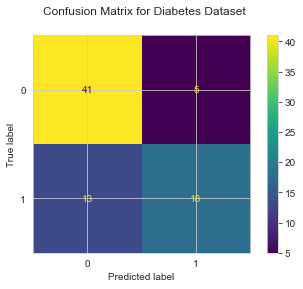

In [16]:
fig = plot_confusion_matrix(classifier1, X_test, Y_test, display_labels=classifier1.classes_)
fig.figure_.suptitle("Confusion Matrix for Diabetes Dataset")
plt.show()

In [17]:
TN, FP, FN, TP = metrics.confusion_matrix(Y_validate, Y_validate_pred).ravel()

In [18]:
print("Precision" , TP / (TP+FP))

Precision 0.6486486486486487


In [19]:
print("Recall" , TP / (TP+FN))

Recall 0.5581395348837209


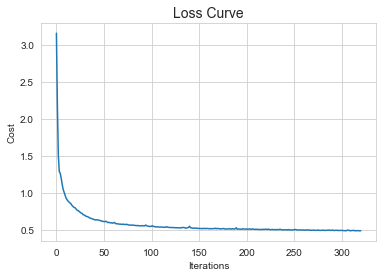

In [20]:
plt.plot(classifier1.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [24]:
classifier4 = MLPClassifier(solver="adam", max_iter=10000, activation = "relu",
                    hidden_layer_sizes = (12),                      
                    alpha = 0.01,
                    batch_size = 74,
                    learning_rate_init = 0.001,
                    random_state=2)

classifier4.fit(X_validate, Y_validate.values.ravel());

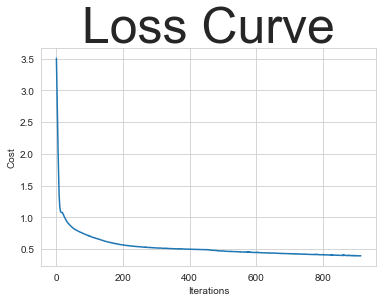

In [25]:
plt.plot(classifier4.loss_curve_)
plt.title("Loss Curve", fontsize=50)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [21]:
##Parameter Tuning

param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 100, 150],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [22]:
grid = GridSearchCV(classifier1, param_grid, n_jobs= -1, cv=5)
grid.fit(X_train, Y_train)

print(grid.best_params_) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


{'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (150, 100, 50), 'learning_rate': 'adaptive', 'max_iter': 100, 'solver': 'sgd'}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [23]:
grid_predictions = grid.predict(X_test) 

print('Accuracy: {:.2f}'.format(accuracy_score(Y_test, grid_predictions)))

Accuracy: 0.71


In [31]:
classifier3 = MLPClassifier(solver="adam", 
                    max_iter=700, 
                    activation = "relu",
                    hidden_layer_sizes = (100),                      
                    alpha = 0.0001,
                    batch_size = "auto",
                    learning_rate_init = 0.001,
                    random_state=None)

classifier3.fit(X_test, Y_test.values.ravel());

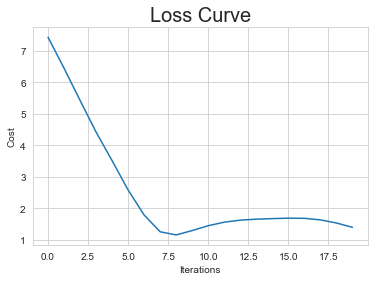

In [32]:
plt.plot(classifier3.loss_curve_)
plt.title("Loss Curve", fontsize=20)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()